In [2]:
import csv
import matplotlib.pyplot as plt
import numpy as np

phraseId, sentenceId, phrases, sentiments = ([] for i in range(4))

with open("data/train.tsv") as tsvfile:
  reader = csv.reader(tsvfile, delimiter='\t')
  for row in reader:
    phraseId.append(row[0])
    sentenceId.append(row[1])
    phrases.append(row[2])
    sentiments.append(row[3])
phraseId = phraseId[1:]
sentenceId = sentenceId[1:]
phrases = phrases[1:]
sentiments = sentiments[1:]

In [3]:
print(phraseId[0:5])
print(sentenceId[0:5])
print(phrases[0:5])

['1', '2', '3', '4', '5']
['1', '1', '1', '1', '1']
['A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .', 'A series of escapades demonstrating the adage that what is good for the goose', 'A series', 'A', 'series']


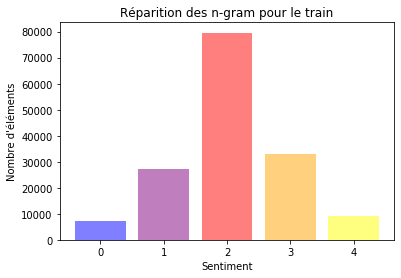

In [4]:
repartition = [0, 0, 0, 0, 0]
for i in range(len(sentiments)):
    repartition[int(sentiments[i])] +=1

y_pos = np.arange(len(repartition))

plt.bar(y_pos, repartition, align='center', alpha=0.5, color=["Blue", "Purple", "Red", "Orange", "Yellow"])
plt.xticks(y_pos)
plt.xlabel('Sentiment')
plt.ylabel("Nombre d'éléments")
plt.title('Réparition des n-gram pour le train')

plt.show()

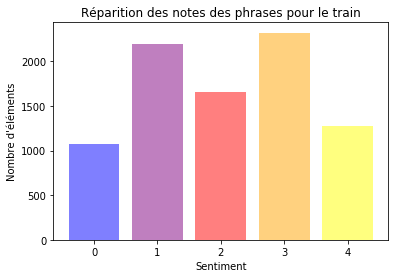

In [5]:
repartition = [0, 0, 0, 0, 0]
current_phrases = 0
for i in range(len(sentiments)):
    if int(sentenceId[i]) != current_phrases:
        repartition[int(sentiments[i])] +=1
        current_phrases = int(sentenceId[i])
        
y_pos = np.arange(len(repartition))

plt.bar(y_pos, repartition, align='center', alpha=0.5, color=["Blue", "Purple", "Red", "Orange", "Yellow"])
plt.xticks(y_pos)
plt.xlabel('Sentiment')
plt.ylabel("Nombre d'éléments")
plt.title('Réparition des notes des phrases pour le train')

plt.show()

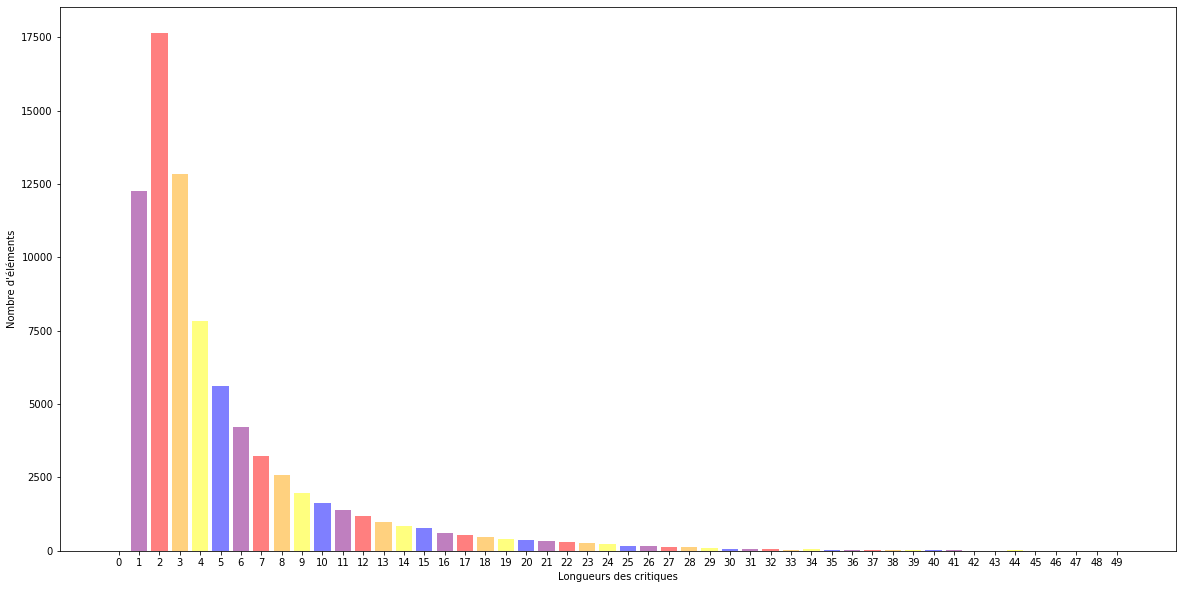

2.648641548122517


In [12]:
repartition = np.zeros(len(max(phrases, key=len)))
current_phrases = 0
for i in range(len(sentiments)):
    if int(sentiments[i]) == 2:
        repartition[len(phrases[i].split(" "))] +=1

repartition = repartition[0:50]
y_pos = np.arange(len(repartition))

plt.figure(figsize=(20,10))
plt.bar(y_pos, repartition, align='center', alpha=0.5, color=["Blue", "Purple", "Red", "Orange", "Yellow"])
plt.xticks(y_pos)
plt.xlabel('Longueurs des critiques')
plt.ylabel("Nombre d'éléments")
plt.title('')

plt.show()

somme = 0
for i in range(len(repartition)):
    somme += i*repartition[i]
    
print(somme/len(phraseId))